## Process L3 satellite ocean color products for climatology 




In [25]:
# setup 

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy
import earthaccess
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr
import os
import netCDF4 
import datetime as dt 



In [8]:
# see data accumulated in directory 

#os.listdir('/home/vboatwright/santalucia/L3_2024trial/')
path = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/data/L3_2024trial/'
files = os.listdir(path)

files

['AQUA_MODIS.20240313_20240320.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240218_20240225.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240210_20240217.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240329_20240405.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240202_20240209.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240321_20240328.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240305_20240312.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240226_20240304.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240125_20240201.L3m.8D.CHL.chlor_a.9km.nc']

In [9]:
# sort the files by date 

# dates are sorted for these at characters 12:20 
sorted_files = sorted(files, key=lambda x: x[12:20])

example = sorted_files[0]
S = netCDF4.Dataset(path+example) 

# process each file by date 
date_intervals = []
dates = []



In [10]:
S

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    product_name: AQUA_MODIS.20240125_20240201.L3m.8D.CHL.chlor_a.9km.nc
    instrument: MODIS
    title: MODISA Level-3 Standard Mapped Image
    project: Ocean Biology Processing Group (NASA/GSFC/OBPG)
    platform: Aqua
    source: satellite observations from MODIS-Aqua
    temporal_range: 8-day
    processing_version: R2022.0.2
    date_created: 2024-11-20T17:18:31.000Z
    history: l3mapgen par=AQUA_MODIS.20240125_20240201.L3m.8D.CHL.chlor_a.9km.nc.param 
    l2_flag_names: ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,CLDICE,COCCOLITH,LOWLW,CHLWARN,CHLFAIL,NAVWARN,MAXAERITER,ATMWARN,HISOLZEN,NAVFAIL,FILTER,HIGLINT
    time_coverage_start: 2024-01-25T00:20:01.000Z
    time_coverage_end: 2024-02-02T02:50:00.000Z
    start_orbit_number: 115570
    end_orbit_number: 115688
    map_projection: Equidistant Cylindrical
    latitude_units: degrees_north
    longitude_units: degrees_east
    northernmost_latitude: 90.0
 

In [11]:
chl_nc = S['chlor_a'][:]
chl = chl_nc.data
chl[chl_nc.mask==True]=np.nan

lon = S['lon'][:].data
lat = S['lat'][:].data


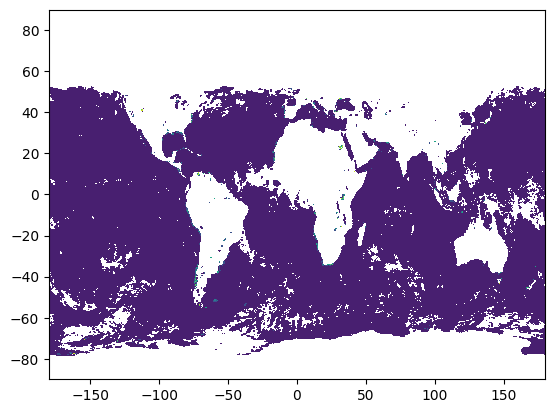

In [12]:
plt.contourf(lon,lat,chl)

In [57]:
chl.shape

(2160, 4320)

TypeError: Input z must be 2D, not 1D

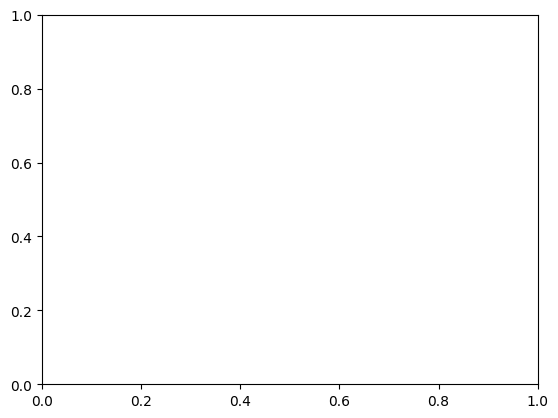

In [14]:
# now save only the area of interest 

xmin = -122
xmax = -118

ymin = 32
ymax = 36

# select only the region of interest 

xbounds = np.logical_and(lon>=xmin,lon<=xmax)
xb = np.nonzero(xbounds==True)[0]
ybounds = np.logical_and(lat>=ymin,lat<=ymax)
yb = np.nonzero(ybounds==True)[0]

# chl shape = (2160,4320) ; lon = 4320; lat = 2160 
# aka, chl shape = (lat,lon)

chl_select = chl[yb,xb]

plt.contourf(chl_select)

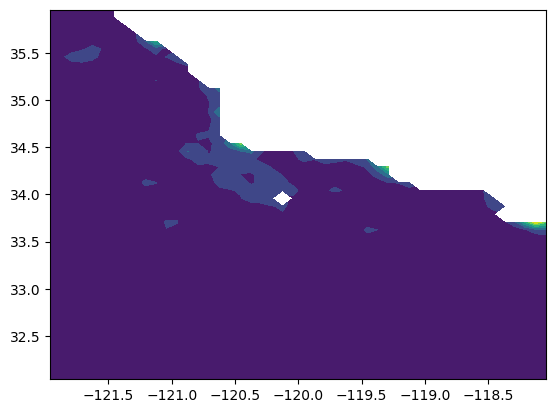

In [18]:
# chatgpt use as you go victoria ! 

# using indices 

# Find indices for lat and lon
lat_indices = np.where((lat >= ymin) & (lat <= ymax))[0]
lon_indices = np.where((lon >= xmin) & (lon <= xmax))[0]

lat_select = lat[np.min(lat_indices):np.max(lat_indices) + 1]
lon_select = lon[np.min(lon_indices):np.max(lon_indices) + 1]


# Use the indices to slice the chlorophyll data
chl_select = chl[np.min(lat_indices):np.max(lat_indices) + 1,
                 np.min(lon_indices):np.max(lon_indices) + 1]

plt.contourf(lon_select,lat_select,chl_select)

In [43]:
# next step will be to save this in a loop according to the data files that i have 




array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [44]:
chl.shape

(2160, 4320)

In [45]:
lon.shape

(4320,)

In [47]:
chl_select = chl[ybounds,xbounds]


In [ ]:
chl[chl==-32767.0] = np.nan

In [30]:
sorted_files

['AQUA_MODIS.20240125_20240201.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240202_20240209.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240210_20240217.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240218_20240225.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240226_20240304.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240305_20240312.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240313_20240320.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240321_20240328.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240329_20240405.L3m.8D.CHL.chlor_a.9km.nc']

In [34]:
sorted_files[0][20:28]

'20240201'

In [57]:
nx = len(lon)
ny = len(lat)
nt = len(sorted_files) 
chl_compiled = np.zeros((ny,nx,nt))*np.nan
date_intervals = []
dates = []

for ii,ff in enumerate(sorted_files):
    # extract the start date string (YYYYMMDD)
    start_date = ff[11:19] 
    # convert to datetime 
    start_dt = dt.datetime.strptime(start_date, '%Y%m%d')
    # and for end date: 
    end_date = ff[20:28] 
    end_dt = dt.datetime.strptime(end_date, '%Y%m%d')

    date_intervals.append((start_dt, end_dt))
    dates.append(start_dt)

    S = netCDF4.Dataset(path+ff) 

    chl_nc = S['chlor_a'][:]
    chl_here = chl_nc.data
    chl_here[chl_nc.mask==True]=np.nan
    
    lon = S['lon'][:].data
    lat = S['lat'][:].data

    chl_compiled[:,:,ii] = chl_here
    

In [43]:
chl_compiled.shape

(2160, 4320, 9)

In [58]:
dates

[datetime.datetime(2024, 1, 25, 0, 0),
 datetime.datetime(2024, 2, 2, 0, 0),
 datetime.datetime(2024, 2, 10, 0, 0),
 datetime.datetime(2024, 2, 18, 0, 0),
 datetime.datetime(2024, 2, 26, 0, 0),
 datetime.datetime(2024, 3, 5, 0, 0),
 datetime.datetime(2024, 3, 13, 0, 0),
 datetime.datetime(2024, 3, 21, 0, 0),
 datetime.datetime(2024, 3, 29, 0, 0)]

In [55]:
sorted_files

['AQUA_MODIS.20240125_20240201.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240202_20240209.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240210_20240217.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240218_20240225.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240226_20240304.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240305_20240312.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240313_20240320.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240321_20240328.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240329_20240405.L3m.8D.CHL.chlor_a.9km.nc']

In [59]:
months = np.array([dd.month for dd in dates]) 
print(months)

[1 2 2 2 2 3 3 3 3]


In [54]:
ii

1

In [53]:
np.nonzero(months==ii)

(array([ 0,  9, 10]),)

In [69]:

chl_mmean = np.zeros((ny,nx,12))

for ii,mm in enumerate(np.arange(1,13)):    
    meets_month = np.nonzero(months==ii)[0]
    chl_thismonth = chl_compiled[:,:,meets_month]

    # calculate mean over all months with data 
    chl_mmean[:,:,ii] = np.nanmean(chl_thismonth,axis=2)

    
    

/tmp/ipykernel_1826960/56362160.py:8: RuntimeWarning: Mean of empty slice
  chl_mmean[:,:,ii] = np.nanmean(chl_thismonth,axis=2)


In [71]:
chl_mmean.shape

(2160, 4320, 12)

In [1]:
# now make plot - 12 months, want 3x4 subplot 

month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

logchl_mmean = np.log(chl_mmean)

fig = plt.figure(figsize=(20,10))
plt.suptitle('Ocean Color Climatology from 2010-2024 8-day Composites')
for ii in np.arange(1,13): 
    plt.subplot(4,3,ii)
    plt.contourf(lon_select,lat_select,chl_mmean[:,:,ii-1])
    plt.title(f'{month_list[ii-1]} Climatology')
    



NameError: name 'np' is not defined

In [36]:
# make monthly climatology 

# in this case, we will now have chl cropped and processes for each timestep 
# we will proceed to loop through each and make a correctly sized (lon,lat) by time (12 months) 

# will have big array of chl = (lon,lat,timeinterval) 
# ... make a big array of chl = (lon,lat,time,month) ? 
# no thats repetitive -- index based on datetime objects in list of dates

months = np.array([dd.month for dd in dates]) 

for ii,dd in enumerate(dates): 
    
    

# make a parse literal where if month == mm, average 
# will result in a median = (lon,lat,12) 

# chl monthly mean 

nx = len(lon)
ny = len(lat) 
nt = len(dates) 

chl_mmean = np.zeros((nx,ny,12))

for ii,mm in enumerate(np.arange(1,13)): 
    
    


[datetime.datetime(2024, 1, 25, 0, 0),
 datetime.datetime(2024, 2, 2, 0, 0),
 datetime.datetime(2024, 2, 10, 0, 0),
 datetime.datetime(2024, 2, 18, 0, 0),
 datetime.datetime(2024, 2, 26, 0, 0),
 datetime.datetime(2024, 3, 5, 0, 0),
 datetime.datetime(2024, 3, 13, 0, 0),
 datetime.datetime(2024, 3, 21, 0, 0),
 datetime.datetime(2024, 3, 29, 0, 0)]

In [39]:
np.arange(1,13)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [21]:
sorted_files

['AQUA_MODIS.20240125_20240201.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240202_20240209.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240210_20240217.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240218_20240225.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240226_20240304.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240305_20240312.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240313_20240320.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240321_20240328.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20240329_20240405.L3m.8D.CHL.chlor_a.9km.nc']

In [23]:
dates

['0240125_',
 '0240125_',
 '0240202_',
 '0240210_',
 '0240218_',
 '0240226_',
 '0240305_',
 '0240313_',
 '0240321_',
 '0240329_']